# Define functions

In [1]:
from math import gcd
def get_vectors(n):
    vectors = []
    lengths = []
    i = 1
    totalsum = 0
    while len(vectors) < n:
        i += 1
        for j in range(1,i):
            if gcd(i,j) == 1:
                vectors.append((i, j))
                totalsum += i + j
            if len(vectors) >= n:
                break
    
    lengths = list(map(lambda v: v[0]**2 + v[1]**2, vectors))
    
    for i in range(i, int(max(lengths + [0])**0.5) + 1):
        for j in range(1,i):
            if gcd(i,j) == 1:
                if (i,j) not in vectors:
                    if (i**2+j**2) < max(lengths):
                        idx = lengths.index(max(lengths))
                        lengths[idx] = i**2+j**2
                        vectors[idx] = (i,j)
                    
    vectors = [(0,1)] + \
    sorted(map(lambda v: (v[1], v[0]), vectors), key=lambda x: x[0]/x[1]) + \
    [(1,1)] + \
    sorted(vectors, key=lambda x: x[0]/x[1])
    
    return vectors
    


def get_shape(n):
    vectors = []     
    
    vectors = get_vectors((n-1)//8)
    
    max_val, max_idx = 0,0
    for i, val in enumerate(map(lambda x: x[0]**2+x[1]**2, vectors)):
        if val > max_val:
            max_val, max_idx = val, i
            
    if 0<n%8<=4 :
        del vectors[max_idx]
        max_val, max_idx = 0,0
        for i, val in enumerate(map(lambda x: x[0]**2+x[1]**2, vectors)):
            if val > max_val:
                max_val, max_idx = val, i
                
    points = [(0,0)]
    #Quadrant 1
    for v in vectors:
        next_point = (points[-1][0]+v[0], points[-1][1]+v[1])
        points.append(next_point)
    
    #Quadrant 2
    for i, v in enumerate(vectors):
        if i == max_idx:
            if 0 < n%4 <= 2:
                continue
        next_point = (points[-1][0]+v[1], points[-1][1]-v[0])
        points.append(next_point)
    
    #Quadrant 3
    for v in vectors:
        next_point = (points[-1][0]-v[0], points[-1][1]-v[1])
        points.append(next_point)
    
    #Quadrant 4
    for i, v in enumerate(vectors):
        if i == max_idx:
            if 0 < n%4 <= 2:
                continue
        next_point = (points[-1][0]-v[1], points[-1][1]+v[0])
        points.append(next_point)
    
    del points[-1]
    #assert(isconvex(points))
    return points

def doublearea(points):
    return sum(p2[0]*p1[1]-p2[1]*p1[0] for p1,p2 in zip(points[1:], points[2:]))

# Test

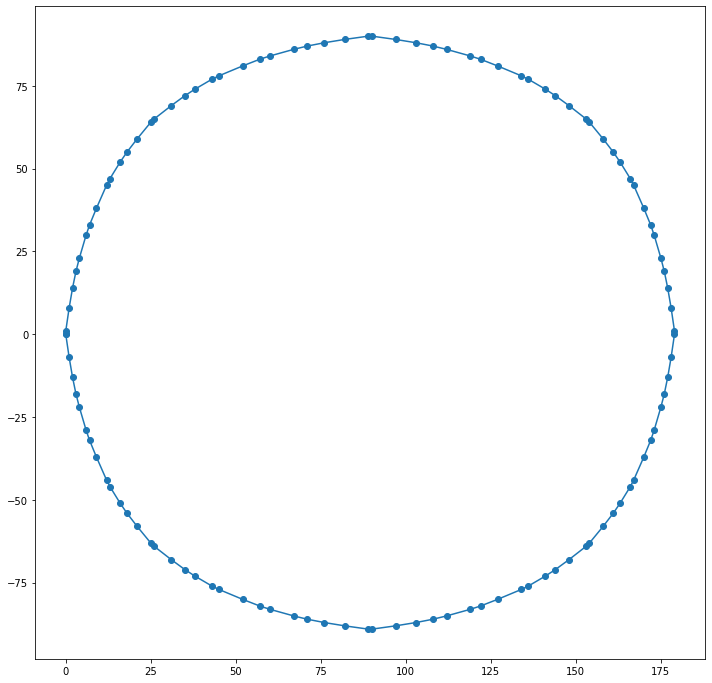

112
49902


In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 12]
shape = get_shape(112)
i,j = zip(*shape)
i = list(i) + [i[0]]
j = list(j) + [j[0]]
plt.plot(i,j)
plt.scatter(i,j)
plt.show()
print(len(shape))
print(doublearea(shape))
#print(shape)

# Comparison with known optimal

In [3]:
length_area_dict = {len(shape): doublearea(shape) for shape in map(get_shape, range(4,42,2))}
best_values = [1, 2, 5, 6, 13, 14, 21, 28, 43, 48, 65, 80, 103, 118, 151, 174, 213, 242, 289, 328, 387, 420, 497, 548]
#from https://gist.github.com/AlephAlpha/7d09076ed6a781ff82ff520280560db7
best_values += [625, 690, 783, 860, 967, 1046, 1177, 1264, 1409, 1498, 1671]

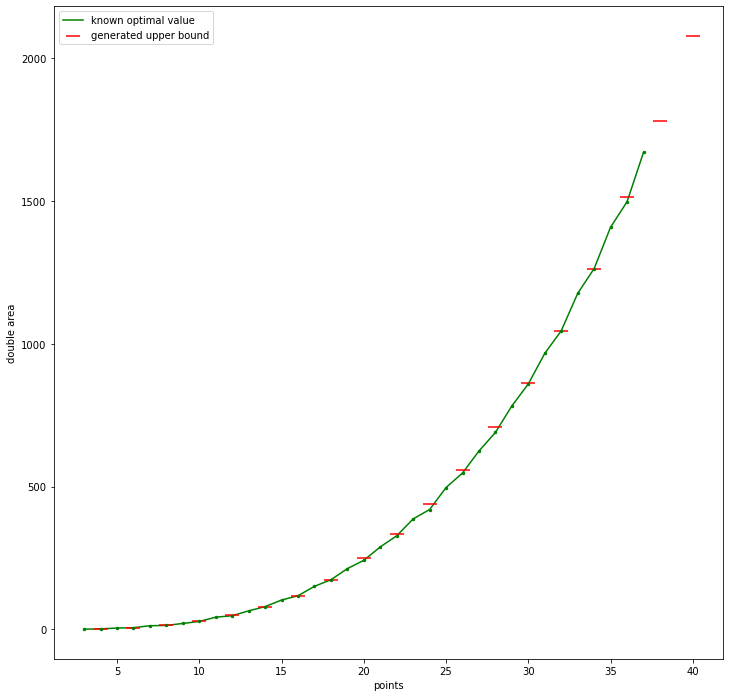

In [4]:
plt.rcParams['figure.figsize'] = [12, 12]
plt.plot(range(3,len(best_values)+3), best_values, c='g', label='known optimal value', zorder=1)
plt.scatter(*zip(*length_area_dict.items()), label='generated upper bound', c='r', marker = '_', s=200, zorder=2)
plt.scatter(range(3,len(best_values)+3), best_values, s=6, c='g', zorder=3)
plt.xlabel('points')
plt.ylabel('double area')
plt.legend()
plt.show()

In [5]:
#Errors (using hacks if n is not multiple of 8)
for i in length_area_dict:
    if i - 3 < len(best_values):
        print("points", i, "optimal area", best_values[i-3], \
              "circle area", length_area_dict[i], \
              "percentage worse", round(100*length_area_dict[i]/best_values[i-3] - 100, 3), "%")

points 4 optimal area 2 circle area 2 percentage worse 0.0 %
points 6 optimal area 6 circle area 6 percentage worse 0.0 %
points 8 optimal area 14 circle area 14 percentage worse 0.0 %
points 10 optimal area 28 circle area 28 percentage worse 0.0 %
points 12 optimal area 48 circle area 52 percentage worse 8.333 %
points 14 optimal area 80 circle area 80 percentage worse 0.0 %
points 16 optimal area 118 circle area 118 percentage worse 0.0 %
points 18 optimal area 174 circle area 174 percentage worse 0.0 %
points 20 optimal area 242 circle area 250 percentage worse 3.306 %
points 22 optimal area 328 circle area 334 percentage worse 1.829 %
points 24 optimal area 420 circle area 438 percentage worse 4.286 %
points 26 optimal area 548 circle area 560 percentage worse 2.19 %
points 28 optimal area 690 circle area 708 percentage worse 2.609 %
points 30 optimal area 860 circle area 864 percentage worse 0.465 %
points 32 optimal area 1046 circle area 1046 percentage worse 0.0 %
points 34 opti

# Scaling

In [6]:
length_area_dict = {len(shape): doublearea(shape) for shape in map(get_shape, range(4,10000,2))}

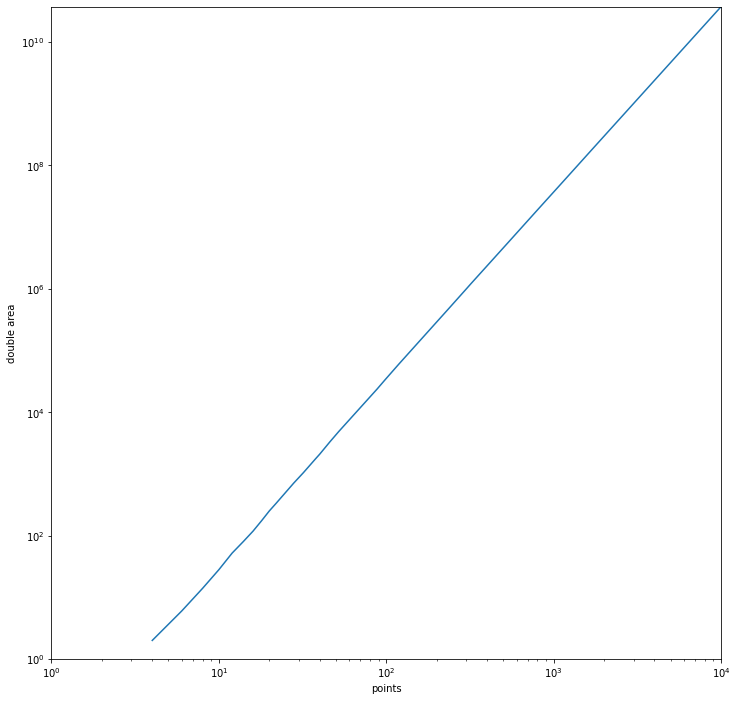

In [7]:
xlimit = 10000
plt.plot(*zip(*length_area_dict.items()))
plt.xlabel('points')
plt.ylabel('double area')
plt.loglog()
plt.xlim([1,xlimit])
plt.ylim([1,max(area for length, area in length_area_dict.items() if length <= xlimit)])
plt.show()

In [8]:
from math import log, pi
n1, n2 = 8000, 2000
m = (log(length_area_dict[n1]/length_area_dict[n2]))/(log(n1/n2))
print(m)
b = length_area_dict[n1]/n1**3
print("found upper bound", 1/b)
print("known lowew bound", (4*(pi**2))) #from http://stanleyrabinowitz.com/bibliography/bounds.pdf
print("known upper boud" , 24) #from http://stanleyrabinowitz.com/bibliography/bounds.pdf 
found_equation = lambda n: b*(n**3)
old_equation = lambda n: 1/(24)*(n**3)

3.000705278236699
found upper bound 27.027709353990634
known lowew bound 39.47841760435743
known upper boud 24


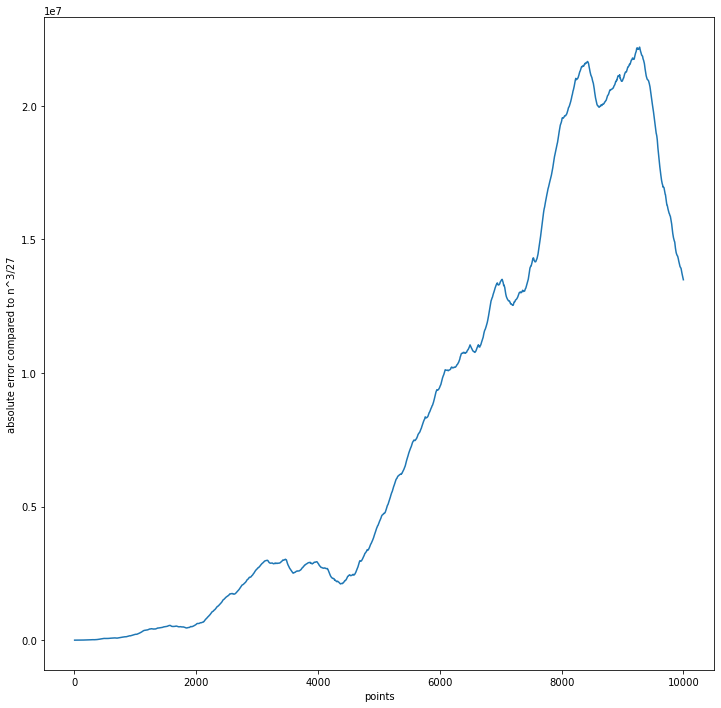

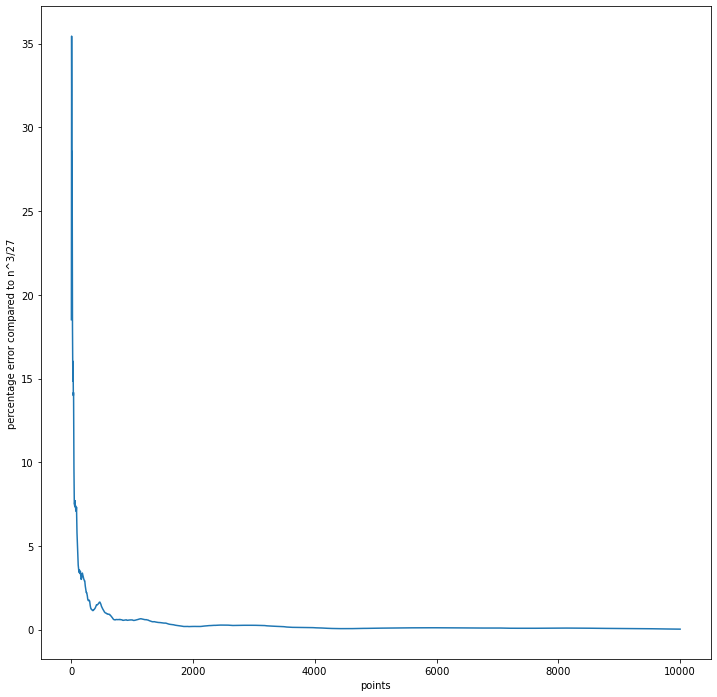

In [9]:
plt.plot(length_area_dict.keys(), [(key**3/27-val) for key,val in length_area_dict.items()])
plt.xlabel('points')
plt.ylabel('absolute error compared to n^3/27')
plt.show()
plt.plot(length_area_dict.keys(), [100*(key**3/27-val)/val for key,val in length_area_dict.items()])
plt.xlabel('points')
plt.ylabel('percentage error compared to n^3/27')
plt.show()
assert all(key**3/27>val for key,val in length_area_dict.items())

In [10]:
print(doublearea(get_shape(int(1e5))), int(int(1e5)**3/27))

37032807243038 37037037037037
